In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [70]:
data = pd.read_csv("../../framingham_heart_study.csv")

In [71]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [72]:
data.shape

(4240, 16)

In [73]:
data.isnull().values.any(), data.isnull().values.sum()

(True, 645)

In [74]:
# new_data = data.dropna()
# replacing missing values with value in next row
new_data = data.fillna(method='bfill', axis=0)

In [75]:
new_data.isnull().values.any(), new_data.isnull().values.sum()

(False, 0)

In [76]:
new_data.shape

(4240, 16)

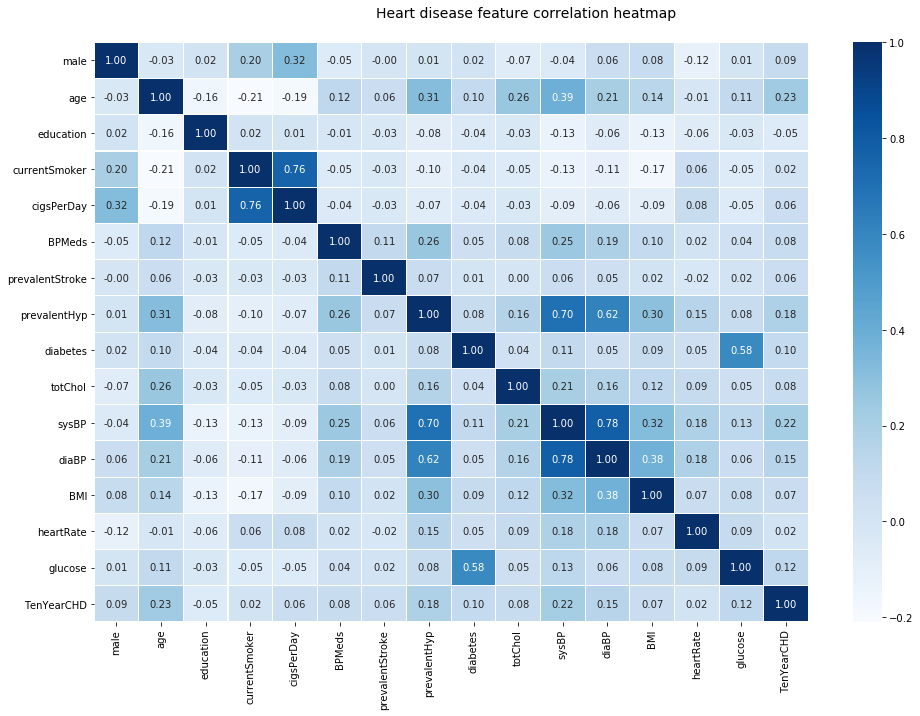

In [77]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(16, 10))
corr = new_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease feature correlation heatmap', fontsize=14)

In [78]:
new_data['TenYearCHD'].value_counts() # this dataset is clearly imbalanced

0    3596
1     644
Name: TenYearCHD, dtype: int64

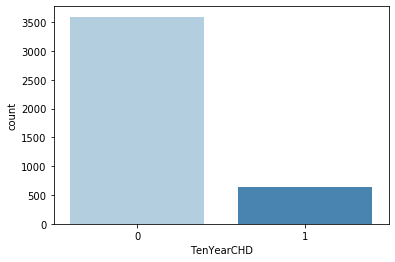

In [79]:
sns.countplot(x="TenYearCHD", data=new_data, palette="Blues")

In [80]:
# accuracy and performance before Balancing the dataset

In [81]:
X_before_balancing = new_data.drop(['TenYearCHD'], axis=1)
y_before_balancing = new_data['TenYearCHD']

In [82]:
X_before_balancing

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,107.0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [83]:
y_before_balancing

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [84]:
X_train_before_balancing, X_test_before_balancing, y_train_before_balancing, y_test_before_balancing = train_test_split(X_before_balancing, y_before_balancing, test_size=0.3, random_state=100)

In [85]:
# decision tree classifier before data balancing
classifier_before_balancing = DecisionTreeClassifier(max_depth=1)

In [86]:
# fitting the classifier before data balancing
classifier_before_balancing.fit(X_train_before_balancing, y_train_before_balancing)

DecisionTreeClassifier(max_depth=1)

In [87]:
# predicting the outcome for testing data
y_pred_before_balancing = classifier_before_balancing.predict(X_test_before_balancing)

In [88]:
# measuring accuracy before data balancing
accuracy_before_balancing = metrics.accuracy_score(y_test_before_balancing, y_pred_before_balancing)
print("Accuracy:",accuracy_before_balancing)

Accuracy: 0.860062893081761


In [89]:
print(classification_report(y_test_before_balancing, y_pred_before_balancing))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1094
           1       0.00      0.00      0.00       178

    accuracy                           0.86      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.74      0.86      0.80      1272



c:\users\biffon momanyi\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


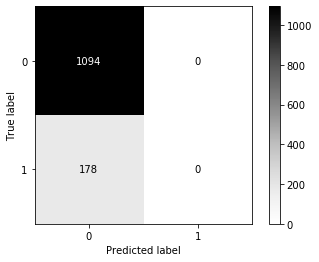

In [90]:
# confusion matrix
print(plot_confusion_matrix(classifier_before_balancing, X_test_before_balancing, y_test_before_balancing, cmap="Greys"))

In [91]:
# after balancing the dataset

In [92]:
# standard scaling before PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler

In [93]:
# First step of PCA for dimesionality reduction is standard normalization.
# (checking if features follow a gaussian distribution where mean=0, std=1),
scaler = StandardScaler()
scaler.fit(new_data)

StandardScaler()

In [94]:
# all values are converted to same scale such that the mean is 0 and standard deviation is 1
scaled_new_data = scaler.transform(new_data)

In [95]:
# PCA
from sklearn.decomposition import PCA

In [96]:
# n_components=2 means we convert number of features to 2
# If 0 < n_components < 1 and svd_solver == 'full', select the number of components 
# such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(n_components=6, svd_solver='full')
pca = PCA()

In [99]:
pca.fit(scaled_new_data)

PCA()

In [100]:
# transforming scaled data so that we reduce number of features/dimensions
x_pca = pca.transform(scaled_new_data)

In [101]:
# shape of scaled data before dimension reduction
scaled_new_data.shape

(4240, 16)

In [102]:
# shape of scaled data after dimension reduction
x_pca.shape

(4240, 16)

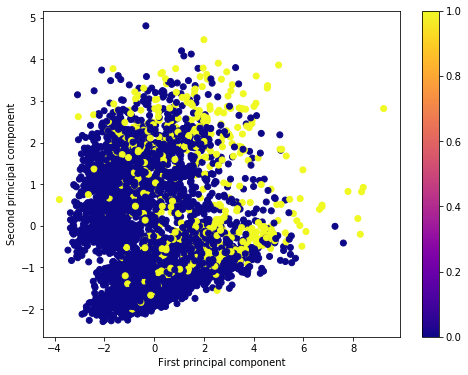

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=new_data["TenYearCHD"], cmap="plasma")

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()

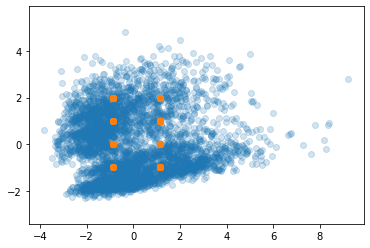

In [104]:
# new reduced dimensions vs initial data before dimension reduction
X_new = pca.inverse_transform(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 2], alpha=0.8)
plt.axis('equal');

In [105]:
# x = independent feature variables, y = dependent/target variable
X = x_pca
y = new_data["TenYearCHD"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [107]:
# decision tree classifier
classifier = DecisionTreeClassifier(max_depth=1)

In [108]:
# fitting the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [109]:
# predicting the outcome for testing data
y_pred = classifier.predict(X_test)

In [132]:
# measuring accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9205974842767296


In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1094
           1       0.75      0.65      0.69       178

    accuracy                           0.92      1272
   macro avg       0.85      0.81      0.82      1272
weighted avg       0.92      0.92      0.92      1272



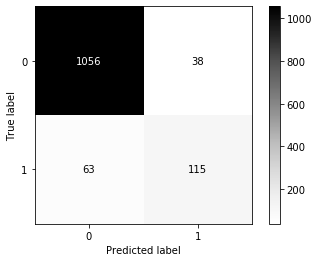

In [112]:
print(plot_confusion_matrix(classifier, X_test, y_test, cmap="Greys"))

In [114]:
# finding the best number of components
for component in range(1,16):
    pca = PCA(n_components=component)
    pca.fit(scaled_new_data)
    x_pca = pca.transform(scaled_new_data)
    X = x_pca
    y = new_data["TenYearCHD"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    classifier =DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Component:",component)
    print("Accuracy:",accuracy*100)
    print("*********************************")
        
#plotting 
# plt.figure(figsize=(8,8))
# plt.plot(component, accuracy)
# plt.show()

Component: 1
Accuracy: 86.0062893081761
*********************************
Component: 2
Accuracy: 86.0062893081761
*********************************
Component: 3
Accuracy: 86.0062893081761
*********************************
Component: 4
Accuracy: 87.89308176100629
*********************************
Component: 5
Accuracy: 87.89308176100629
*********************************
Component: 6
Accuracy: 87.89308176100629
*********************************
Component: 7
Accuracy: 87.89308176100629
*********************************
Component: 8
Accuracy: 92.05974842767296
*********************************
Component: 9
Accuracy: 92.05974842767296
*********************************
Component: 10
Accuracy: 92.05974842767296
*********************************
Component: 11
Accuracy: 92.05974842767296
*********************************
Component: 12
Accuracy: 92.05974842767296
*********************************
Component: 13
Accuracy: 92.05974842767296
*********************************
Component: 14
Accuracy: 

In [115]:
# Oversampling and PCA
# oversampling with smote
from imblearn.over_sampling import SMOTE, ADASYN

In [116]:
sm = SMOTE(random_state=100)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [117]:
print("After oversampling, shape of train x: ", X_train_res.shape)
print("After oversampling, shape of train y: ", y_train_res.shape)

After oversampling, shape of train x:  (5004, 15)
After oversampling, shape of train y:  (5004,)


In [118]:
# svm after oversampling
classifier.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=1)

In [119]:
y_pred2 = classifier.predict(X_test)

Accuracy: 0.8710691823899371
*************************************************
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1094
           1       0.53      0.76      0.62       178

    accuracy                           0.87      1272
   macro avg       0.74      0.83      0.77      1272
weighted avg       0.90      0.87      0.88      1272

*************************************************


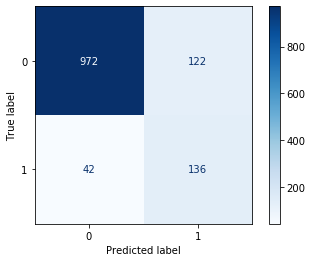

In [120]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("*************************************************")
print(classification_report(y_test, y_pred2))
print("*************************************************")
print(plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues"))

In [130]:
# finding the best number of components after oversampling with SMOTE
for component in range(1,16):
    pca = PCA(n_components=component)
    pca.fit(scaled_new_data)
    x_pca = pca.transform(scaled_new_data)
    X = x_pca
    y = new_data["TenYearCHD"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    sm = SMOTE(random_state=100)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
    classifier = classifier.fit(X_train_res, y_train_res)
    y_pred3 = classifier.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred3)
    print("Components:",component)
    print("Accuracy:",accuracy*100)
    print("******************************")

Components: 1
Accuracy: 62.342767295597476
******************************
Components: 2
Accuracy: 62.342767295597476
******************************
Components: 3
Accuracy: 62.814465408805034
******************************
Components: 4
Accuracy: 78.85220125786164
******************************
Components: 5
Accuracy: 78.85220125786164
******************************
Components: 6
Accuracy: 66.5880503144654
******************************
Components: 7
Accuracy: 64.70125786163521
******************************
Components: 8
Accuracy: 87.10691823899371
******************************
Components: 9
Accuracy: 87.10691823899371
******************************
Components: 10
Accuracy: 87.26415094339622
******************************
Components: 11
Accuracy: 87.10691823899371
******************************
Components: 12
Accuracy: 87.10691823899371
******************************
Components: 13
Accuracy: 87.10691823899371
******************************
Components: 14
Accuracy: 87.97169811320755
**

In [131]:
# Results after oversampling but before PCA

In [123]:
x_before_pca = new_data.drop(['TenYearCHD'], axis=1)
y_before_pca = new_data['TenYearCHD']

In [124]:
X_train_no_pca, X_test_no_pca, y_train_no_pca, y_test_no_pca = train_test_split(x_before_pca, y_before_pca, test_size=0.3, random_state=100)

In [125]:
# oversampling with SMOTE
sm_no_pca = SMOTE(random_state=100)
X_train_res_no_pca, y_train_res_no_pca = sm_no_pca.fit_sample(X_train_no_pca, y_train_no_pca.ravel())

In [126]:
print("After oversampling, shape of train x: ", X_train_res_no_pca.shape)
print("After oversampling, shape of train y: ", y_train_res_no_pca.shape)

After oversampling, shape of train x:  (5004, 15)
After oversampling, shape of train y:  (5004,)


In [127]:
# svm classifier after oversampling before PCA
classifier.fit(X_train_res_no_pca, y_train_res_no_pca)

DecisionTreeClassifier(max_depth=1)

In [128]:
y_pred_no_pca = classifier.predict(X_test_no_pca)

Accuracy: 0.5204402515723271
******************************************************
              precision    recall  f1-score   support

           0       0.93      0.48      0.63      1094
           1       0.20      0.78      0.31       178

    accuracy                           0.52      1272
   macro avg       0.56      0.63      0.47      1272
weighted avg       0.83      0.52      0.59      1272

******************************************************


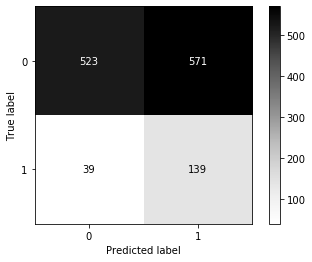

In [129]:
print("Accuracy:",metrics.accuracy_score(y_test_no_pca, y_pred_no_pca))
print("******************************************************")
print(classification_report(y_test_no_pca, y_pred_no_pca))
print("******************************************************")
print(plot_confusion_matrix(classifier, X_test_no_pca, y_test_no_pca, cmap="Greys"))